In [44]:
import importlib
import utils
importlib.reload(utils)
from utils import load_data, CLASSES, IMG_SIZE, data_augmentation, evaluate_model
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import (
    Conv2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Activation,
    MaxPool2D,
    BatchNormalization,
    Dropout,
)
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


## Reading Data

In [45]:
data, labels = load_data("./Dataset")

## Splitting Data

In [46]:
X_train, X_val, y_train, y_val   = train_test_split(data, labels,     test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train = np.array(X_train)
X_val   = np.array(X_val)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)


## Preprocessing

In [47]:
# apply augmentation on training data
X_train_aug, y_train_aug = data_augmentation(X_train, y_train)

# apply augmentation on validation data
X_val_aug, y_val_aug = data_augmentation(X_val, y_val)

## Model

### Model Building

In [48]:
model = Sequential()
# 1st layer (CONV + pool + batchnorm)
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(2, 2),
        padding="same",
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    )
)
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# 2nd layer (CONV + pool + batchnorm)
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.0005),
    )
)
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), padding="valid"))
model.add(BatchNormalization())
# layer 3 (CONV + batchnorm)
model.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.0005),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
# layer 4 (CONV + batchnorm)
model.add(
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.0005),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
# layer 5 (CONV + batchnorm)
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.0005),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding="valid"))
model.add(Flatten())
# layer 6 (Dense layer + dropout)
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.5))
# layer 7 (Dense layers)
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.5))
# layer 8 (softmax output layer)
model.add(Dense(units=2, activation="softmax"))

### Model Training

In [49]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    X_train_aug, y_train_aug,
    batch_size=64,
    epochs=1,
    validation_data=(X_val_aug, y_val_aug)
)

2023-05-19 23:30:14.029560: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1042808832 exceeds 10% of free system memory.


21/21 [==============================] - 98s 5s/step - loss: 18.7860 - accuracy: 0.6667 - val_loss: 250.8952 - val_accuracy: 0.4703


## Evaluation

Accuracy:  0.4702702702702703
F1 score:  0.31985294117647056
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.47      1.00      0.64        87

    accuracy                           0.47       185
   macro avg       0.24      0.50      0.32       185
weighted avg       0.22      0.47      0.30       185



/home/ahmed/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ahmed/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ahmed/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


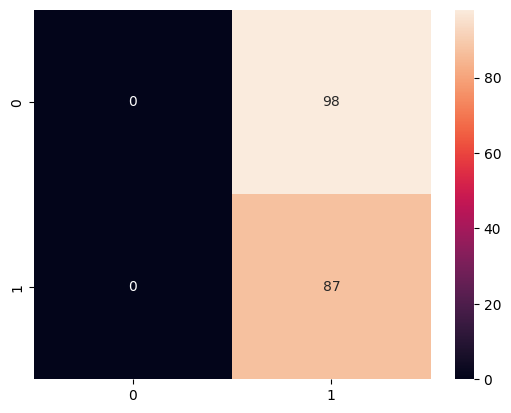

In [50]:
evaluate_model(model, X_val, y_val)

### Another Architecture

In [51]:
# model = Sequential()
# # 1st layer (CONV + pool + batchnorm)
# model.add(
#     Conv2D(
#         filters=96,
#         kernel_size=(11, 11),
#         strides=(4, 4),
#         padding="valid",
#         input_shape=(227, 227, 3),
#     )
# )
# model.add(Activation("relu"))
# model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
# model.add(BatchNormalization())
# # 2nd layer (CONV + pool + batchnorm)
# model.add(
#     Conv2D(
#         filters=256,
#         kernel_size=(5, 5),
#         strides=(1, 1),
#         padding="same",
#         kernel_regularizer=l2(0.0005),
#     )
# )
# model.add(Activation("relu"))
# model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="valid"))
# model.add(BatchNormalization())
# # layer 3 (CONV + batchnorm)
# model.add(
#     Conv2D(
#         filters=384,
#         kernel_size=(3, 3),
#         strides=(1, 1),
#         padding="same",
#         kernel_regularizer=l2(0.0005),
#     )
# )
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# # layer 4 (CONV + batchnorm)
# model.add(
#     Conv2D(
#         filters=384,
#         kernel_size=(3, 3),
#         strides=(1, 1),
#         padding="same",
#         kernel_regularizer=l2(0.0005),
#     )
# )
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# # layer 5 (CONV + batchnorm)
# model.add(
#     Conv2D(
#         filters=256,
#         kernel_size=(3, 3),
#         strides=(1, 1),
#         padding="same",
#         kernel_regularizer=l2(0.0005),
#     )
# )
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="valid"))
# model.add(Flatten())
# # layer 6 (Dense layer + dropout)
# model.add(Dense(units=4096, activation="relu"))
# model.add(Dropout(0.5))
# # layer 7 (Dense layers)
# model.add(Dense(units=4096, activation="relu"))
# model.add(Dropout(0.5))
# # layer 8 (softmax output layer)
# model.add(Dense(units=2, activation="softmax"))